import some Prerequisites

In [1]:
from HodaDatasetReader import read_hoda_cdb
from keras.models import Sequential,save_model,load_model,Model
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from matplotlib import pyplot as plt
import cv2
from keras.utils import to_categorical
import numpy as np
import random

Using TensorFlow backend.


load data

In [2]:
print('Reading Test 20000.cdb ...')
test_images, test_labels = read_hoda_cdb('Test 20000.cdb')
print('Reading RemainingSamples.cdb ...')
val_images, val_labels = read_hoda_cdb('./RemainingSamples.cdb')
print('Reading Train 60000.cdb ...')
train_images, train_labels = read_hoda_cdb('./Train 60000.cdb')

Reading Test 20000.cdb ...
Reading RemainingSamples.cdb ...
Reading Train 60000.cdb ...


modify data

In [0]:
def prepareData(data):
  temp =np.zeros((len(data),25,25))
  i = 0
  for i in range(len(data)):
    temp[i] = np.resize(data[i],(25,25))
    i+=1
  temp/=255
  temp = np.reshape(temp,(len(data),25,25,1))
  return temp

X_train = prepareData(train_images)
X_test = prepareData(test_images)
X_val = np.array(prepareData(val_images))

y_test = to_categorical(test_labels)
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)

create model

In [4]:
def Create_model():
  model = Sequential()
  model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(25,25,1),activation = 'relu'))
  model.add(MaxPooling2D(pool_size =(2,2)))
  model.add(Conv2D(filters=32,kernel_size=(3,3)))
  model.add(Flatten())
  model.add(Dense(10,activation = 'sigmoid'))
  model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['acc'])
  model.summary()
  return model
model = Create_model()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 23, 23, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                25930     
Total params: 35,498
Trainable params: 35,498
Non-trainable params: 0
_________________________________________________________________


train the model

In [5]:
history = model.fit(X_train,y_train,epochs = 10,validation_data=(X_val,y_val))

Train on 60000 samples, validate on 22352 samples
Epoch 1/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.9030 - acc: 0.7040 - val_loss: 0.7578 - val_acc: 0.7540
Epoch 2/10
60000/60000 [==============================] - 38s 626us/step - loss: 0.5831 - acc: 0.8115 - val_loss: 0.6934 - val_acc: 0.7805
Epoch 3/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.5079 - acc: 0.8355 - val_loss: 0.6727 - val_acc: 0.7785
Epoch 4/10
60000/60000 [==============================] - 37s 609us/step - loss: 0.4601 - acc: 0.8501 - val_loss: 0.6396 - val_acc: 0.7979
Epoch 5/10
60000/60000 [==============================] - 43s 708us/step - loss: 0.4262 - acc: 0.8607 - val_loss: 0.6129 - val_acc: 0.8075
Epoch 6/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.4040 - acc: 0.8690 - val_loss: 0.6129 - val_acc: 0.8101
Epoch 7/10
60000/60000 [==============================] - 37s 611us/step - loss: 0.3805 - acc: 0.8753 - val_loss: 0.

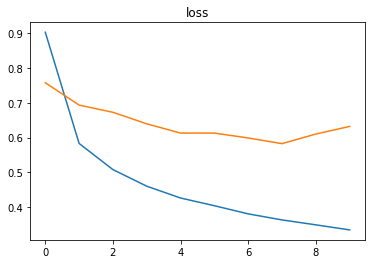

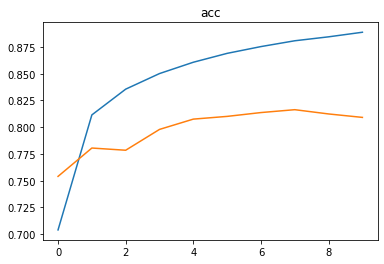

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.show()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('acc')
plt.show()

test the model

In [7]:
res = model.evaluate(X_test,y_test)
print('loss = {} _ acc = {}'.format(res[0],res[1]))

20000/20000 [==============================] - 4s 185us/step
loss = 0.7147213243983686 _ acc = 0.7850000262260437


predict some numbers

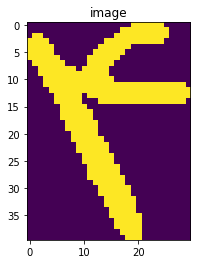

predict result:4  real result:4


In [8]:
ind = random.randint(0,10000)
pred = model.predict_classes(np.array([X_test[ind]]))
plt.imshow(test_images[ind])
plt.title('image')
plt.show()

print('predict result:{}  real result:{}'.format(pred[0],test_labels[ind]))

In [0]:
save_model(model,'saved_model.hdf5')

Inspecting the activations of second convolutional layer

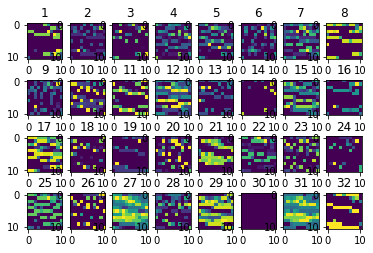

In [12]:
first_layer_model = Model(model.input , model.layers[1].output)
activation = first_layer_model.predict(np.array([X_test[ind]]))[0]
fig=plt.figure()
columns = 4
rows = 8
for i in range(1,32+1):
  fig.add_subplot(columns,rows,i)
  plt.imshow(activation[:,:,i-1] *255)
  plt.title(i)
plt.show()